In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

In [5]:
df = pd.read_excel("genderbyyear.xlsx")
df

,gender,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s
0,female,481,575,1666,1924,1330,2623,2724,1104,121
1,male,5455,6074,12710,8921,6132,5049,4892,1906,133
2,non-binary,1,1,1,1,0,0,0,1,1
3,unspecified,260,370,1479,1504,857,608,719,733,52


In [6]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [7]:
!pip install rpy2


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [8]:
%%R

# Ensure the readxl library is available
library(readxl)

# Read data
df <- read_xlsx('genderbyyear.xlsx')
print(df)


# A tibble: 4 × 10
  gender `1940s` `1950s` `1960s` `1970s` `1980s` `1990s` `2000s` `2010s` `2020s`
  <chr>    <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 female     481     575    1666    1924    1330    2623    2724    1104     121
2 male      5455    6074   12710    8921    6132    5049    4892    1906     133
3 non-b…       1       1       1       1       0       0       0       1       1
4 unspe…     260     370    1479    1504     857     608     719     733      52


Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires an x or y aesthetic.
Run `rlang::last_trace()` to see where the error occurred.


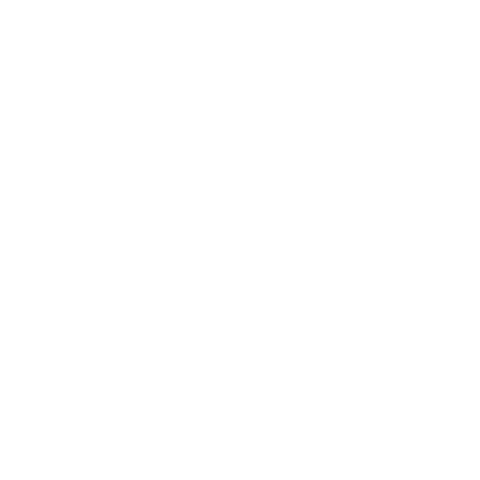

RRuntimeError: Error in geom_histogram() : 
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires an x or y aesthetic.


In [9]:
%%R

# Plot
ggplot(df) + geom_histogram()

In [19]:
!pip install plotnine



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme, element_text

# Load the dataset
df = pd.read_excel('genderbyyear.xlsx')

# Melt the dataframe to transform it from wide to long format
df_long = pd.melt(df, id_vars=['gender'], var_name='Decade', value_name='Number_of_Artists')

# Display the transformed dataframe
print(df_long.head())


        gender Decade  Number_of_Artists
0       female  1940s                481
1         male  1940s               5455
2   non-binary  1940s                  1
3  unspecified  1940s                260
4       female  1950s                575


In [11]:
print(df_long)

         gender Decade  Number_of_Artists
0        female  1940s                481
1          male  1940s               5455
2    non-binary  1940s                  1
3   unspecified  1940s                260
4        female  1950s                575
5          male  1950s               6074
6    non-binary  1950s                  1
7   unspecified  1950s                370
8        female  1960s               1666
9          male  1960s              12710
10   non-binary  1960s                  1
11  unspecified  1960s               1479
12       female  1970s               1924
13         male  1970s               8921
14   non-binary  1970s                  1
15  unspecified  1970s               1504
16       female  1980s               1330
17         male  1980s               6132
18   non-binary  1980s                  0
19  unspecified  1980s                857
20       female  1990s               2623
21         male  1990s               5049
22   non-binary  1990s            

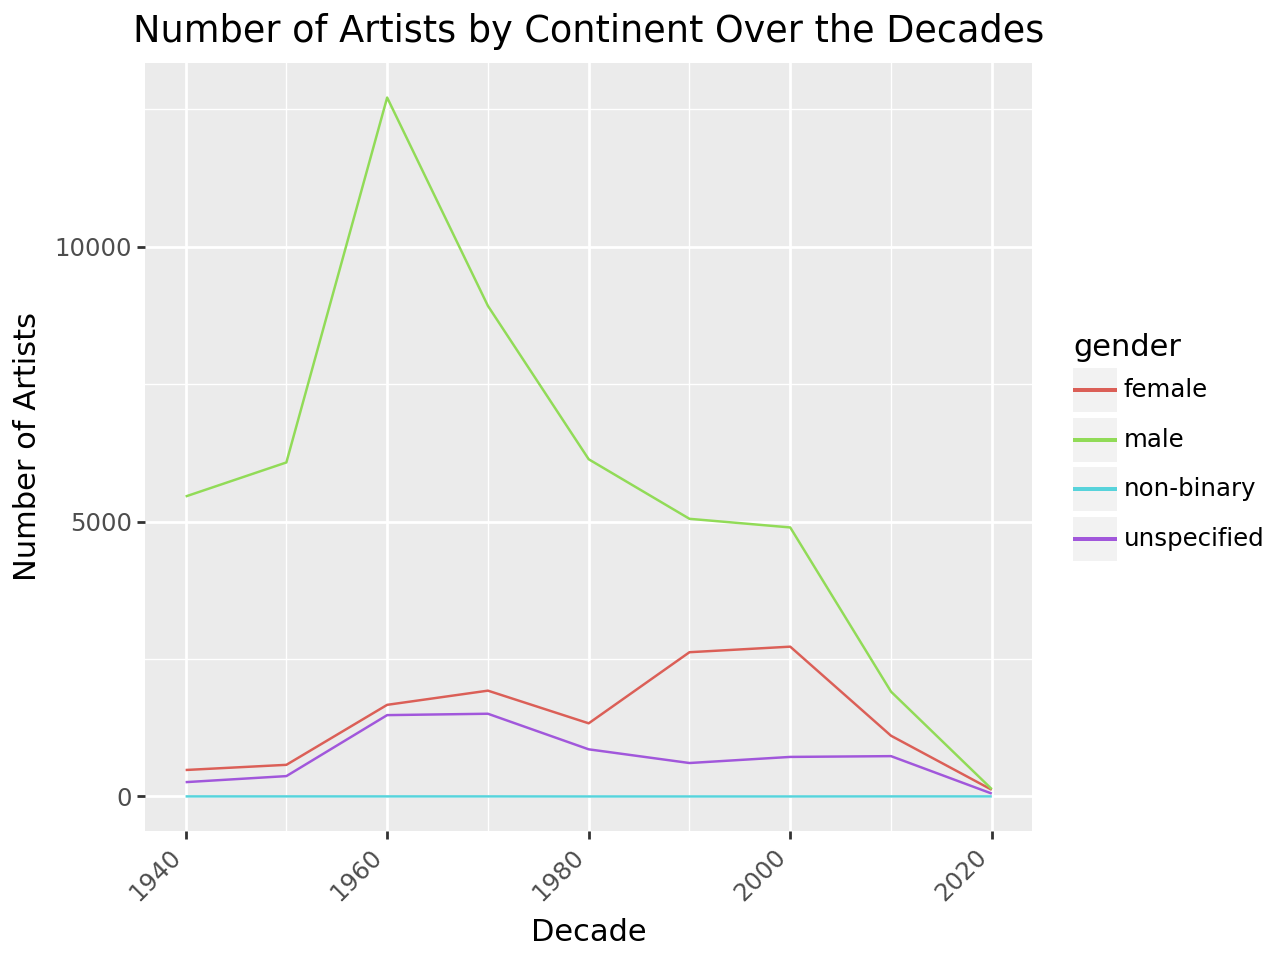

In [13]:
from plotnine import ggplot, aes, geom_line, labs, theme, element_text
import pandas as pd

# Load the dataset
df = pd.read_excel('genderbyyear.xlsx')

# Melt the dataframe to transform it from wide to long format
df_long = pd.melt(df, id_vars=['gender'], var_name='Decade', value_name='Number_of_Artists')

# Convert 'Decade' to a numeric type (for plotting purposes)
# Attempt to extract the first 4 characters of the 'Decade' and convert to integer
df_long['Decade'] = pd.to_numeric(df_long['Decade'].str[:4], errors='coerce')

# Create the line chart using the transformed dataframe
plot = (ggplot(df_long, aes(x='Decade', y='Number_of_Artists', group='gender', color='gender')) +
        geom_line() +
        labs(title='Number of Artists by Continent Over the Decades',
             x='Decade',
             y='Number of Artists') +
        theme(axis_text_x=element_text(rotation=45, hjust=1))
       )

# Display the plot
plot


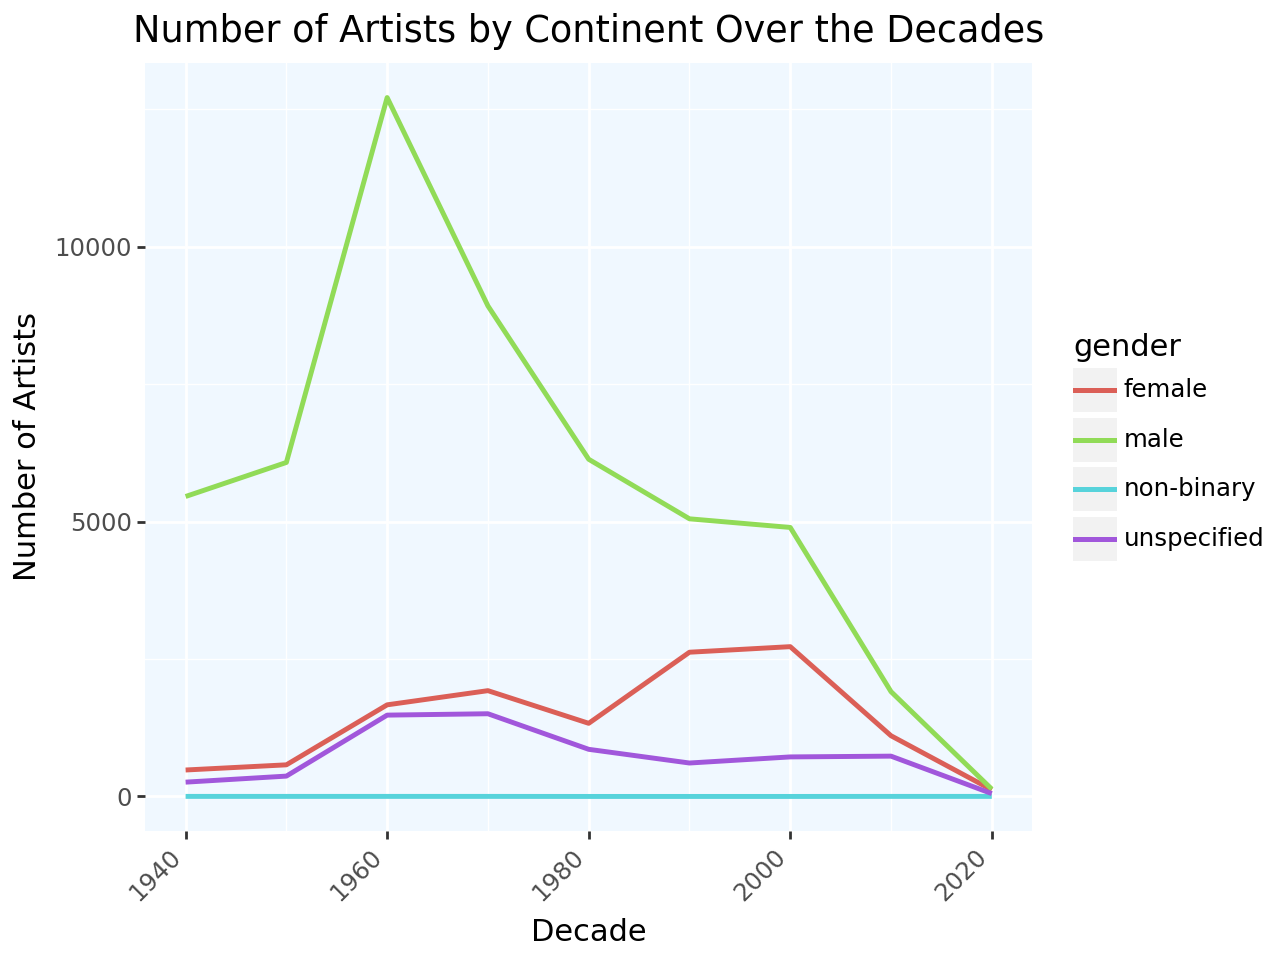

In [15]:
from plotnine import ggplot, aes, geom_line, labs, theme, element_text, element_rect
import pandas as pd

# Assuming df_long is your already prepared DataFrame

# Create the line chart with thicker lines
plot = (ggplot(df_long, aes(x='Decade', y='Number_of_Artists', group='gender', color='gender')) +
        geom_line(size=1) +  # Adjust line thickness here
        labs(title='Number of Artists by Continent Over the Decades',
             x='Decade',
             y='Number of Artists') +
        theme(axis_text_x=element_text(rotation=45, hjust=1),
              panel_background=element_rect(fill='#F0F8FF', color=None))  # Light blue background
       )

# Display the plot
plot


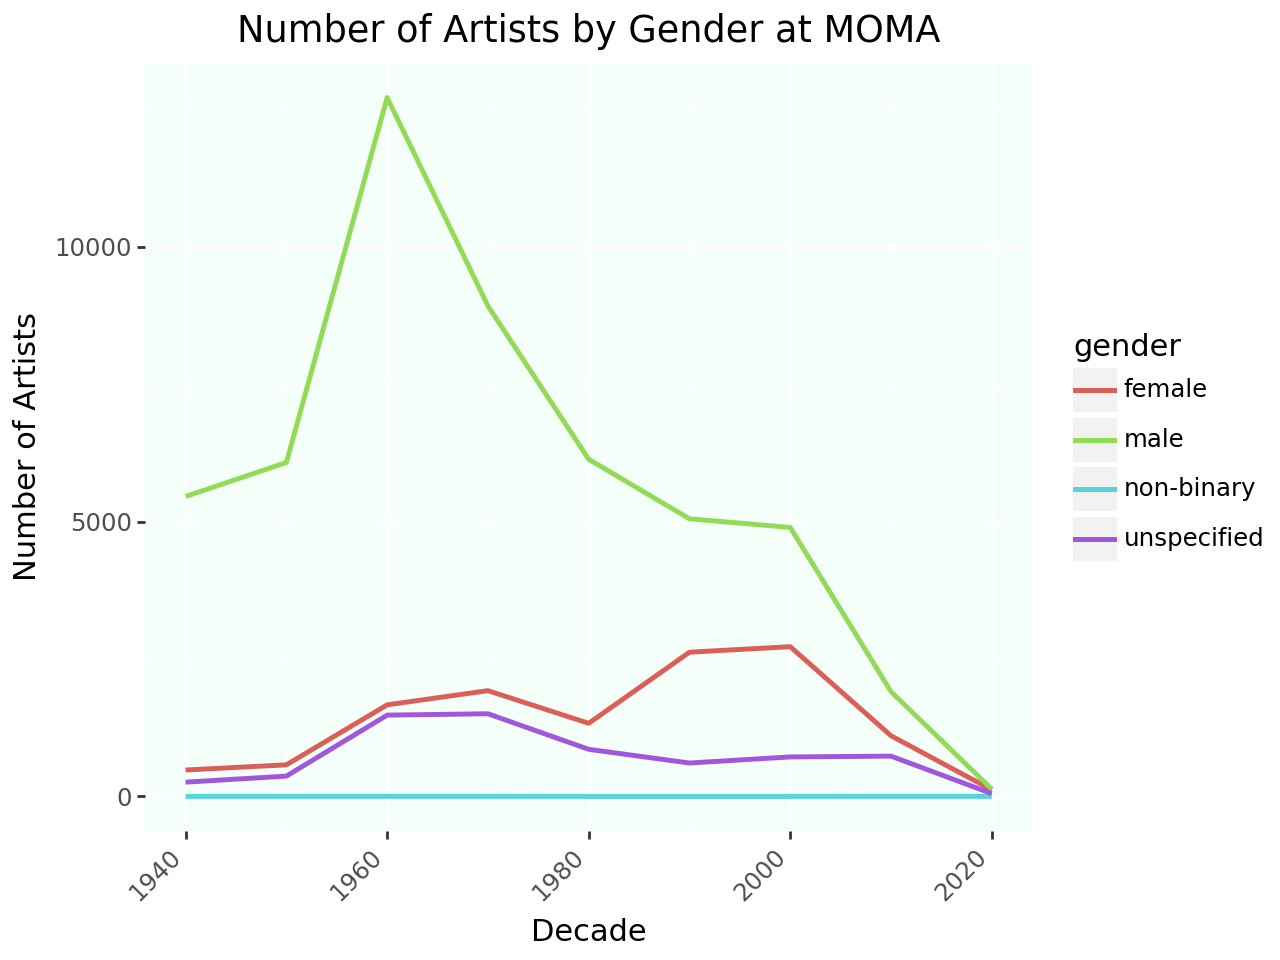

In [18]:
from plotnine import ggplot, aes, geom_line, labs, theme, element_text, element_rect
import pandas as pd

# Assuming df_long is your already prepared DataFrame

# Create the line chart with thicker lines
plot = (ggplot(df_long, aes(x='Decade', y='Number_of_Artists', group='gender', color='gender')) +
        geom_line(size=1) +  # Adjust line thickness here
        labs(title='Number of Artists by Gender at MOMA',
             x='Decade',
             y='Number of Artists') +
        theme(axis_text_x=element_text(rotation=45, hjust=1),
              panel_background=element_rect(fill='#F5FFFA', color=None))  # Light blue background
       )

# Display the plot
plot
